<a href="https://colab.research.google.com/github/TharaPR/californiahousing/blob/main/LinearRegressionMLImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load Fetch California Housing Dataset

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
calif = fetch_california_housing()
type(calif)

sklearn.utils._bunch.Bunch

In [4]:
calif.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
# Check the description of the dataset
print(calif.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
calif.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [7]:
calif.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [8]:
calif.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

###Preparaing the Dataset

In [9]:
df = pd.DataFrame(calif.data, columns=calif.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [10]:
df['Price']=calif.target

In [11]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Summarize the stats

In [13]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Check the missing values

In [14]:
df.isnull()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum() # Use aggregrate function to see if there are any missing values in entire dataset

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

### Analyzse Correlated Features

In [16]:
# Rxploratory Data Analysis
# Correlation
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [17]:
import seaborn as sns
#sns.pairplot(df)


Text(0, 0.5, 'Price')

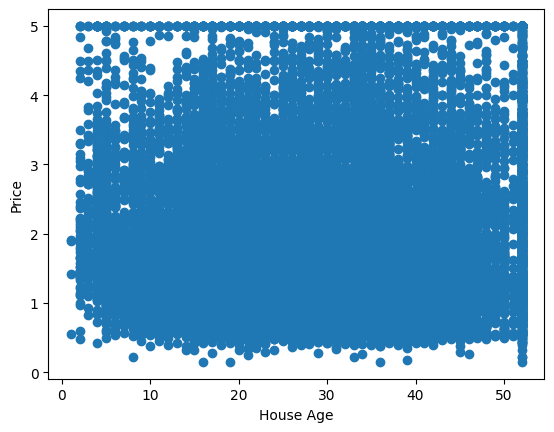

In [18]:
plt.scatter(df['HouseAge'], df['Price'])
plt.xlabel('House Age')
plt.ylabel('Price')

<Axes: xlabel='HouseAge', ylabel='Price'>

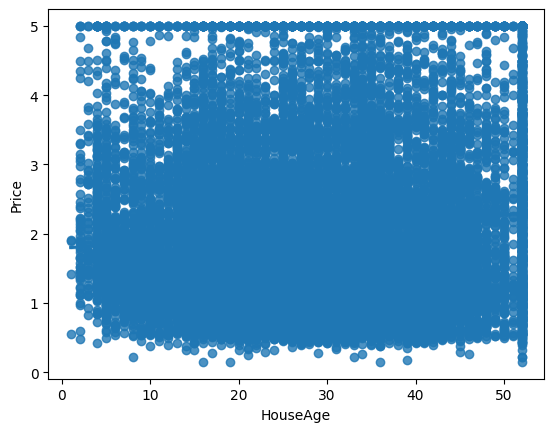

In [19]:
# Do a regression
import seaborn as sns
sns.regplot(x='HouseAge', y='Price', data=df)

<Axes: xlabel='AveRooms', ylabel='Price'>

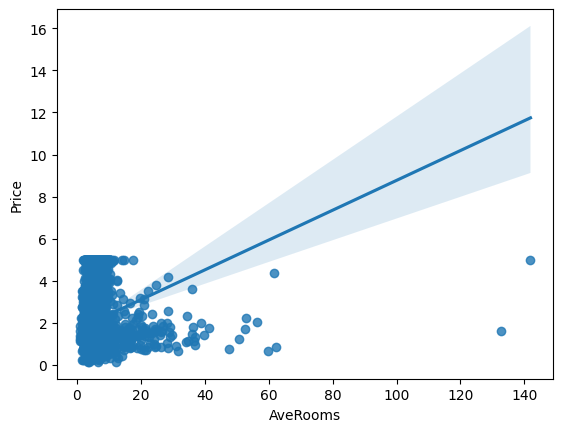

In [20]:
sns.regplot(x='AveRooms', y='Price', data=df)

<Axes: xlabel='AveBedrms', ylabel='Price'>

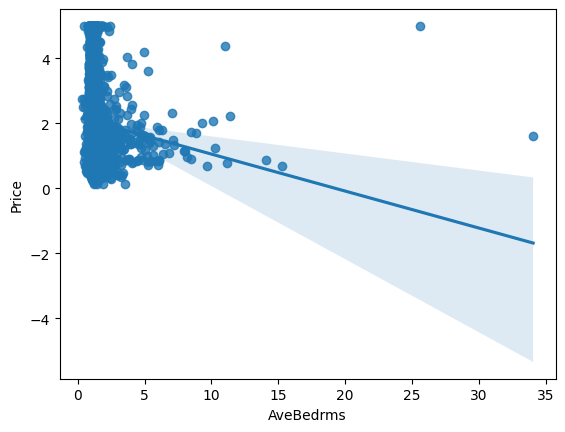

In [21]:
sns.regplot(x='AveBedrms', y='Price', data=df)

In [22]:
# Independent and Dependent feature
X=df.iloc[:, :-1]
y=df.iloc[:, -1]

In [23]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [24]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [25]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2953,1.9830,42.0,4.555147,0.922794,776.0,2.852941,35.35,-119.02
17396,2.8750,26.0,5.169761,1.050398,1575.0,4.177719,34.96,-120.45
13457,3.3066,36.0,5.443636,0.960000,894.0,3.250909,34.11,-117.38
13448,2.5272,5.0,6.080049,1.402709,2204.0,2.714286,34.10,-117.41
20009,2.3194,25.0,5.210412,1.036876,1527.0,3.312364,36.15,-119.06
...,...,...,...,...,...,...,...,...
7704,4.0536,34.0,5.455268,1.075547,1333.0,2.650099,33.96,-118.14
11298,4.0362,33.0,5.100935,1.026168,2223.0,4.155140,33.78,-117.91
5188,2.0789,34.0,4.216374,0.964912,661.0,3.865497,33.94,-118.27
19996,2.8152,27.0,6.142029,1.081159,1268.0,3.675362,36.16,-119.45


In [27]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
16687,2.1702,27.0,5.008197,1.109836,1407.0,2.306557,35.12,-120.59
8578,9.0812,35.0,4.047458,0.989831,507.0,1.718644,33.89,-118.41
7285,2.2054,45.0,3.724138,0.954023,1288.0,4.934866,33.98,-118.24
6543,2.2577,26.0,3.585067,1.187271,3792.0,4.641371,34.06,-118.02
4293,2.2612,36.0,2.515642,1.071197,3155.0,3.403452,34.09,-118.30
...,...,...,...,...,...,...,...,...
16074,3.4583,52.0,5.211905,1.030952,1147.0,2.730952,37.74,-122.49
12983,5.2817,19.0,5.848018,0.964758,1253.0,2.759912,38.68,-121.30
15198,6.2715,16.0,6.835052,0.996564,814.0,2.797251,32.90,-117.09
202,1.9338,43.0,3.242009,1.077626,1506.0,3.438356,37.78,-122.23


In [28]:
## Standardize dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
X_train = scaler.fit_transform(X_train)

In [30]:
X_test=scaler.transform(X_test)

In [31]:
X_train

array([[-9.87597278e-01,  1.06893991e+00, -3.30167915e-01, ...,
        -2.04581776e-02, -1.33024570e-01,  2.75740547e-01],
       [-5.21625094e-01, -2.02004825e-01, -1.01655845e-01, ...,
         9.31420022e-02, -3.15408105e-01, -4.38957067e-01],
       [-2.96161423e-01,  5.92335632e-01,  1.70246941e-04, ...,
         1.36677200e-02, -7.12910681e-01,  1.09539376e+00],
       ...,
       [-9.37500044e-01,  4.33467541e-01, -4.56122815e-01, ...,
         6.63688697e-02, -7.92411196e-01,  6.50581954e-01],
       [-5.52864036e-01, -1.22570779e-01,  2.59830925e-01, ...,
         5.00647431e-02,  2.45772003e-01,  6.08314745e-02],
       [ 2.51100755e+00, -9.96345281e-01,  4.22973070e-01, ...,
        -1.13718164e-02, -1.19926677e+00,  1.23533455e+00]])

In [32]:
X_test

array([[-0.88980581, -0.12257078, -0.16172515, ..., -0.06731079,
        -0.24058409, -0.50892746],
       [ 2.72043384,  0.51290159, -0.51892561, ..., -0.11772458,
        -0.8157937 ,  0.58061156],
       [-0.87141767,  1.30724204, -0.63913509, ...,  0.15806765,
        -0.77370519,  0.66557561],
       ...,
       [ 1.2526737 , -0.99634528,  0.51749503, ..., -0.02523364,
        -1.27876729,  1.24033243],
       [-1.01329888,  1.14837395, -0.8183894 , ...,  0.02974138,
         1.00336515, -1.32858067],
       [ 0.21066169,  0.27459945, -0.15647979, ..., -0.00274743,
        -1.30682629,  1.19535146]])

## Model Trainng

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
regression=LinearRegression()
regression.fit(X_train, y_train)

## Print the co-efficients and the intercept
print(regression.coef_)
print(regression.intercept_)

[ 0.83238754  0.12171561 -0.28771084  0.33094369 -0.00192842 -0.0451394
 -0.89334623 -0.86086486]
2.0632536406423028


In [35]:
## On which parameters has the model been trained?
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [36]:
## Prediction with test data
reg_pred=regression.predict(X_test)
reg_pred

array([2.01657479, 4.70579853, 1.70015236, ..., 2.84738563, 1.82686498,
       2.31849719])

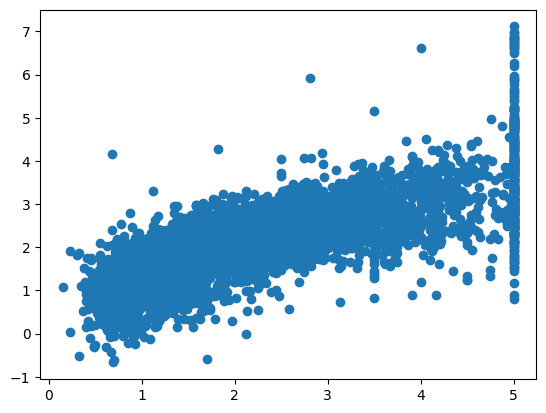

In [37]:
## Plot a scatter plot for the prediction
plt.scatter(y_test, reg_pred)

Model is performing well as both y_test and predicted values are have linear represtentation

In [38]:
## Prediction with residuals
residuals=y_test-reg_pred
residuals

16687   -0.219575
8578     0.294211
7285    -0.450152
6543     0.167918
4293     0.480753
           ...   
16074    0.744470
12983   -0.521536
15198   -0.296386
202     -0.701865
14584   -0.640497
Name: Price, Length: 6192, dtype: float64

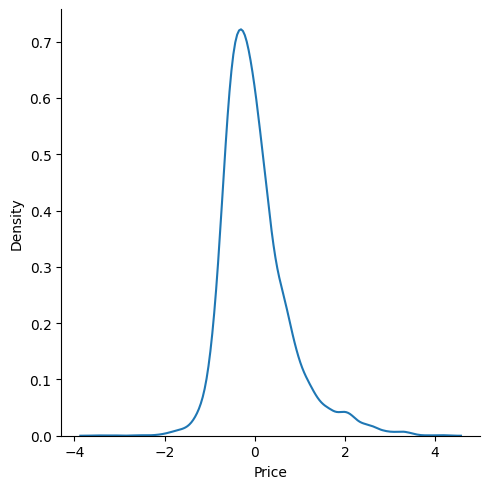

In [39]:
## Plot the residuals
sns.displot(residuals, kind='kde')

Model is performing well because whenever one plots with residuals, we need to get a normal distribution

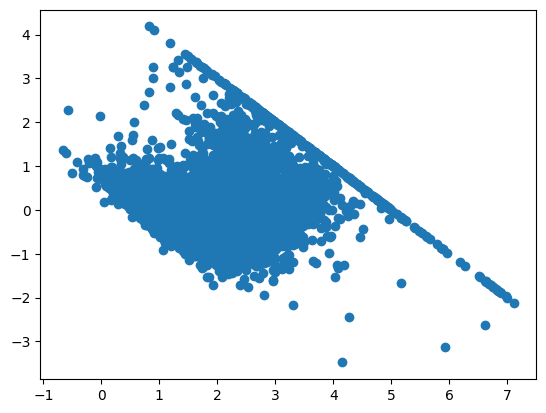

In [40]:
## Scatter plot with respect to predictions and residuals
## uniform distribution
plt.scatter(reg_pred, residuals)

In [41]:
## Performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.5401476008436309
0.5472559117729383
0.7397674714212151


## R Square and adjusted R Square

Formula: R^2 = 1 - SSR/SST


R^2 = Coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [42]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score) 

# If R2 score is closer to 1, it is better

0.5949911667833114


Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]

where

R2: The R2 of the model 

n: The number of observations 

k: The number of predictor variables

In [43]:
1 - (1-score) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5944671378870259

In [44]:
X_test.shape

(6192, 8)

### New Data Prediction

In [45]:
calif.data[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [46]:
calif.data[0].shape

(8,)

In [47]:
calif.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [48]:
calif.data[0].reshape(1,-1).shape

(1, 8)

In [49]:
regression.predict(calif.data[0].reshape(1,-1))

array([82.96004964])

In [50]:
scaler.transform(calif.data[0].reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.32550674,  0.98950586,  0.57292091, -0.14511567, -0.96781146,
        -0.04595911,  1.05013016, -1.32858067]])

In [51]:
regression.predict(scaler.fit_transform(calif.data[0].reshape(1,-1)))

array([2.06325364])

### Pickling the model file for Deployment

In [52]:
import pickle

In [53]:
pickle.dump(regression, open('regmodel.pk1', 'wb'))

In [54]:
pickled_model=pickle.load(open('regmodel.pk1', 'rb'))

In [55]:
pickled_model.predict(scaler.fit_transform(calif.data[0].reshape(1,-1)))

array([2.06325364])